## Task 1
There are some imports

In [1]:
import paramiko
import re
from local_settings import MY_LOGIN, MY_PASSWORD #В файле хранятся только две текстовые константы.

Connecting to Linux Server by SSH

In [2]:
client = paramiko.SSHClient()
client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
client.connect('127.0.0.1',5555,MY_LOGIN,MY_PASSWORD)

Executing linux command and taking data we need by re.search()

In [3]:
stdin, stdout, stderr = client.exec_command('cat /etc/services')
output = stdout.readlines()
output = ''.join([line for line in output if re.search('\t5[0-9][0-9][0-9]/udp',line)])
print(output)
stdout.close()
stdin.close()
stderr.close()
client.close()

sip		5060/udp
sip-tls		5061/udp
mdns		5353/udp			# Multicast DNS
amqp		5672/udp
noclog		5354/udp			# noclogd with UDP (nocol)
hostmon		5355/udp			# hostmon uses UDP (nocol)
rplay		5555/udp			# RPlay audio service



Task 1 Output:
<img src="img.jpg">

## Task 2
Some imports

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('SalesJan2009.csv')
df.head()

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,...,Account_Created.day-of-month,Account_Created.day-of-week,Account_Created.hour,Account_Created.minute,Last_Login.year,Last_Login.month,Last_Login.day-of-month,Last_Login.day-of-week,Last_Login.hour,Last_Login.minute
0,1/2/09 6:17,Product1,1200,Mastercard,carolina,Basildon,England,United Kingdom,1/2/09 6:00,1/2/09 6:08,...,2,5,6,0,9,1,2,5,6,8
1,1/2/09 4:53,Product1,1200,Visa,Betina,Parkville,MO,United States,1/2/09 4:42,1/2/09 7:49,...,2,5,4,42,9,1,2,5,7,49
2,1/2/09 13:08,Product1,1200,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/09 16:21,1/3/09 12:32,...,1,4,16,21,9,1,3,6,12,32
3,1/3/09 14:44,Product1,1200,Visa,Gouya,Echuca,Victoria,Australia,9/25/05 21:13,1/3/09 14:22,...,25,7,21,13,9,1,3,6,14,22
4,1/4/09 12:56,Product2,3600,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/09 12:45,...,15,6,15,47,9,1,4,7,12,45


Найдем среднее значение цены для платежей с Mastercard

In [6]:
df1 = df.loc[df['Payment_Type']=='Mastercard']
print("Среднее значение цены для платежей с MC:",round(df1['Price'].mean(),2))

Среднее значение цены для платежей с MC: 1655.05


<AxesSubplot:xlabel='Date'>

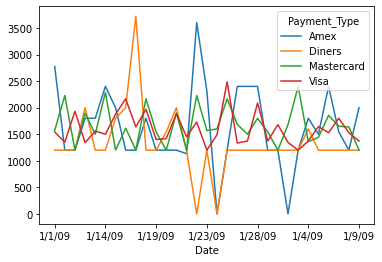

In [7]:
df['Date'] = df['Transaction_date'].apply(lambda x: x.split(' ')[0])
df.groupby(['Payment_Type','Date'])['Price'].mean().unstack('Payment_Type',fill_value=0).plot.line()